In [2]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import re

In [3]:
df = pd.read_csv('EL_Dataset\euroleague_players.csv')

c:\Users\Ivan\Anaconda3\envs\python_course\Lib\site-packages\matplotlib\text.py:756: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
c:\Users\Ivan\Anaconda3\envs\python_course\Lib\site-packages\matplotlib\text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
c:\Users\Ivan\Anaconda3\envs\python_course\Lib\site-packages\matplotlib\text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
c:\Users\Ivan\Anaconda3\envs\python_course\Lib\site-packages\matplotlib\text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in

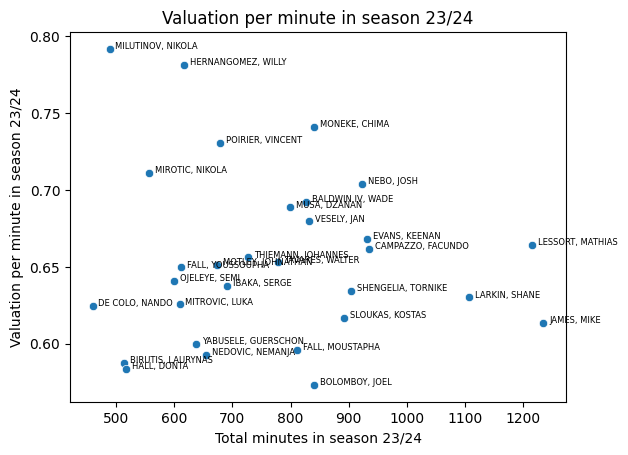

In [4]:
pd.set_option('display.max_columns', None)
df_val_per_minute = df[(df['season_code'] == 'E2023') & (df['minutes'] >= 400)].copy()
df_val_per_minute['valuation_per_minute'] = df_val_per_minute['valuation'] / df_val_per_minute['minutes']
df_val_per_minute = df_val_per_minute.loc[:,['player', 'valuation_per_minute', 'minutes']].sort_values(by='valuation_per_minute', ascending=False).fillna(0).head(30)
sns.scatterplot(data=df_val_per_minute, x='minutes', y='valuation_per_minute')

for i in range(len(df_val_per_minute)):
    plt.text(df_val_per_minute.iloc[i:i+1]['minutes'] + 10, df_val_per_minute.iloc[i:i+1]['valuation_per_minute'], re.sub(r'\d+', '', df_val_per_minute.iloc[i:i+1]['player'].to_string()).strip(), fontsize=6)

plt.xlabel("Total minutes in season 23/24")
plt.ylabel("Valuation per minute in season 23/24")
plt.title("Valuation per minute in season 23/24")


    
plt.show()

In [5]:
df_temp = df[(df['season_code'] == 'E2023')].copy()
#df_temp.groupby(['team_id'])['three_points_attempted'].agg(Total_3pt_attempts=('three_points_attempted', 'sum'))
df_3pt = df_temp.groupby(['team_id']).agg(Total_3pt_attempts=('three_points_attempted', 'sum'), Total_3pt_made=('three_points_made', 'sum')).copy()
df_3pt['3pt_perc'] = df_3pt['Total_3pt_made'] / df_3pt['Total_3pt_attempts']
df_3pt.sort_values(by='3pt_perc', ascending=False, inplace=True)
df_3pt






,Total_3pt_attempts,Total_3pt_made,3pt_perc
team_id,,,
ULK,1199,470,0.391993
PAN,966,377,0.390269
ZAL,851,331,0.388954
MAD,1076,407,0.378253
OLY,1030,387,0.375728
BAS,1143,424,0.370954
IST,940,348,0.370213
MIL,930,341,0.366667
TEL,973,356,0.365879


In [6]:
df_temp.loc[:,['player','plus_minus']].sort_values(by='plus_minus', ascending=False).head(20)

,player,plus_minus
747,"CAMPAZZO, FACUNDO",308
4848,"TAVARES, WALTER",254
1712,"GRANT, JERIAN",198
2819,"LESSORT, MATHIAS",177
3440,"MUSA, DZANAN",176
5226,"VESELY, JAN",176
4656,"SLOUKAS, KOSTAS",169
5358,"WALKUP, THOMAS",166
2365,"KALINIC, NIKOLA",165
1043,"DECK, GABRIEL",152


In [7]:
df.sort_values(by='three_points_made', ascending=False).head(10)

,season_player_id,season_code,player_id,player,team_id,games_played,games_started,minutes,points,two_points_made,two_points_attempted,three_points_made,three_points_attempted,free_throws_made,free_throws_attempted,offensive_rebounds,defensive_rebounds,total_rebounds,assists,steals,turnovers,blocks_favour,blocks_against,fouls_committed,fouls_received,valuation,plus_minus,minutes_per_game,points_per_game,two_points_made_per_game,two_points_attempted_per_game,two_points_percentage,three_points_made_per_game,three_points_attempted_per_game,three_points_percentage,free_throws_made_per_game,free_throws_attempted_per_game,free_throws_percentage,offensive_rebounds_per_game,defensive_rebounds_per_game,total_rebounds_per_game,assists_per_game,steals_per_game,turnovers_per_game,blocks_favour_per_game,blocks_against_per_game,fouls_committed_per_game,fouls_received_per_game,valuation_per_game,plus_minus_per_game
2037,E2023_P011948_BAS,E2023,P011948,"HOWARD, MARKUS",BAS,39.0,18.0,898.4,759,106,219,148,370,103,123,11,35,46,62,18,74,1,25,105,103,430,4,23.04,19.46,2.72,5.62,0.484,3.79,9.49,0.400,2.64,3.15,0.837,0.28,0.90,1.18,1.59,0.46,1.90,0.03,0.64,2.69,2.64,11.03,0.10
5434,E2023_P006661_ULK,E2023,P006661,"WILBEKIN, SCOTTIE",ULK,41.0,18.0,1010.9,534,49,115,122,304,70,80,22,70,92,137,46,68,1,4,72,106,514,143,24.66,13.02,1.20,2.80,0.426,2.98,7.41,0.401,1.71,1.95,0.875,0.54,1.71,2.24,3.34,1.12,1.66,0.02,0.10,1.76,2.59,12.54,3.49
4554,E2017_PKVZ_KHI,E2017,PKVZ,"SHVED, ALEXEY",KHI,34.0,34.0,1097.2,740,132,263,107,324,155,189,8,81,89,178,44,106,8,17,65,205,694,-25,32.27,21.76,3.88,7.74,0.502,3.15,9.53,0.330,4.56,5.56,0.820,0.24,2.38,2.62,5.24,1.29,3.12,0.24,0.50,1.91,6.03,20.41,-0.74
753,E2023_P010612_OLY,E2023,P010612,"CANAAN, ISAIAH",OLY,41.0,41.0,945.3,455,53,97,94,221,67,76,9,41,50,58,35,47,3,9,93,72,344,72,23.06,11.10,1.29,2.37,0.546,2.29,5.39,0.425,1.63,1.85,0.882,0.22,1.00,1.22,1.41,0.85,1.15,0.07,0.22,2.27,1.76,8.39,1.76
4244,E2017_PCVM_CSK,E2017,PCVM,"RODRIGUEZ, SERGIO",CSK,36.0,22.0,936.7,495,79,138,92,210,61,68,11,62,73,178,30,77,4,13,76,68,498,177,26.02,13.75,2.19,3.83,0.572,2.56,5.83,0.438,1.69,1.89,0.897,0.31,1.72,2.03,4.94,0.83,2.14,0.11,0.36,2.11,1.89,13.83,4.92
2725,E2021_P007200_IST,E2021,P007200,"LARKIN, SHANE",IST,39.0,28.0,1243.8,573,87,170,92,241,123,137,9,107,116,206,49,92,1,16,46,183,728,124,31.89,14.69,2.23,4.36,0.512,2.36,6.18,0.382,3.15,3.51,0.898,0.23,2.74,2.97,5.28,1.26,2.36,0.03,0.41,1.18,4.69,18.67,3.18
395,E2023_PBCN_VIR,E2023,PBCN,"BELINELLI, MARCO",VIR,35.0,33.0,796.5,493,65,148,91,238,90,104,6,52,58,60,14,45,0,9,72,66,321,-23,22.76,14.09,1.86,4.23,0.439,2.60,6.80,0.382,2.57,2.97,0.865,0.17,1.49,1.66,1.71,0.40,1.29,0.00,0.26,2.06,1.89,9.17,-0.66
5432,E2021_P006661_TEL,E2021,P006661,"WILBEKIN, SCOTTIE",TEL,35.0,35.0,1016.0,539,85,180,91,240,96,102,10,65,75,144,53,70,0,14,57,108,528,34,29.03,15.40,2.43,5.14,0.472,2.60,6.86,0.379,2.74,2.91,0.941,0.29,1.86,2.14,4.11,1.51,2.00,0.00,0.40,1.63,3.09,15.09,0.97
5430,E2019_P006661_TEL,E2019,P006661,"WILBEKIN, SCOTTIE",TEL,26.0,25.0,676.3,419,42,96,90,207,65,80,4,47,51,88,32,58,1,6,40,110,411,144,26.01,16.12,1.62,3.69,0.438,3.46,7.96,0.435,2.50,3.08,0.812,0.15,1.81,1.96,3.38,1.23,2.23,0.04,0.23,1.54,4.23,15.81,5.54
3704,E2020_P006433_DYR,E2020,P006433,"PANGOS, KEVIN",DYR,39.0,39.0,1129.2,528,95,182,89,228,71,84,10,68,78,260,27,113,0,19,91,145,576,74,28.95,13.54,2.44,4.67,0.522,2.28,5.85,0.390,1.82,2.15,0.845,0.26,1.74,2.00,6.67,0.69,2.90,0.00,0.49,2.33,3.72,14.77,1.90


In [8]:
df[df['player'].str.contains('DAVIES, BRANDON')]

,season_player_id,season_code,player_id,player,team_id,games_played,games_started,minutes,points,two_points_made,two_points_attempted,three_points_made,three_points_attempted,free_throws_made,free_throws_attempted,offensive_rebounds,defensive_rebounds,total_rebounds,assists,steals,turnovers,blocks_favour,blocks_against,fouls_committed,fouls_received,valuation,plus_minus,minutes_per_game,points_per_game,two_points_made_per_game,two_points_attempted_per_game,two_points_percentage,three_points_made_per_game,three_points_attempted_per_game,three_points_percentage,free_throws_made_per_game,free_throws_attempted_per_game,free_throws_percentage,offensive_rebounds_per_game,defensive_rebounds_per_game,total_rebounds_per_game,assists_per_game,steals_per_game,turnovers_per_game,blocks_favour_per_game,blocks_against_per_game,fouls_committed_per_game,fouls_received_per_game,valuation_per_game,plus_minus_per_game
1024,E2017_P007870_ZAL,E2017,P007870,"DAVIES, BRANDON",ZAL,36.0,33.0,625.0,335,120,208,0,0,95,112,53,74,127,34,32,48,13,17,111,92,352,-2,17.36,9.31,3.33,5.78,0.577,0.00,0.00,0.000,2.64,3.11,0.848,1.47,2.06,3.53,0.94,0.89,1.33,0.36,0.47,3.08,2.56,9.78,-0.06
1025,E2018_P007870_ZAL,E2018,P007870,"DAVIES, BRANDON",ZAL,34.0,33.0,824.1,483,176,315,0,0,131,172,62,124,186,67,33,65,15,20,99,153,573,53,24.24,14.21,5.18,9.26,0.559,0.00,0.00,0.000,3.85,5.06,0.762,1.82,3.65,5.47,1.97,0.97,1.91,0.44,0.59,2.91,4.50,16.85,1.56
1026,E2019_P007870_BAR,E2019,P007870,"DAVIES, BRANDON",BAR,28.0,14.0,561.8,268,99,189,5,13,55,70,34,75,109,45,31,56,16,9,71,69,289,89,20.07,9.57,3.54,6.75,0.524,0.18,0.46,0.385,1.96,2.50,0.786,1.21,2.68,3.89,1.61,1.11,2.00,0.57,0.32,2.54,2.46,10.32,3.18
1027,E2020_P007870_BAR,E2020,P007870,"DAVIES, BRANDON",BAR,35.0,10.0,749.8,419,147,260,6,14,107,142,63,93,156,51,25,72,15,15,100,164,487,149,21.42,11.97,4.20,7.43,0.565,0.17,0.40,0.429,3.06,4.06,0.754,1.80,2.66,4.46,1.46,0.71,2.06,0.43,0.43,2.86,4.69,13.91,4.26
1028,E2021_P007870_BAR,E2021,P007870,"DAVIES, BRANDON",BAR,36.0,9.0,716.5,356,134,246,6,24,70,103,38,95,133,56,23,62,10,15,87,121,372,136,19.90,9.89,3.72,6.83,0.545,0.17,0.67,0.250,1.94,2.86,0.680,1.06,2.64,3.69,1.56,0.64,1.72,0.28,0.42,2.42,3.36,10.33,3.78
1029,E2022_P007870_MIL,E2022,P007870,"DAVIES, BRANDON",MIL,33.0,13.0,607.0,336,116,211,7,20,83,118,29,78,107,63,21,56,10,12,75,127,378,-34,18.39,10.18,3.52,6.39,0.550,0.21,0.61,0.350,2.52,3.58,0.703,0.88,2.36,3.24,1.91,0.64,1.70,0.30,0.36,2.27,3.85,11.45,-1.03
1030,E2023_P007870_PAM,E2023,P007870,"DAVIES, BRANDON",PAM,28.0,18.0,626.0,338,114,211,15,49,65,81,32,75,107,56,23,55,17,7,76,87,343,-10,22.36,12.07,4.07,7.54,0.540,0.54,1.75,0.306,2.32,2.89,0.802,1.14,2.68,3.82,2.00,0.82,1.96,0.61,0.25,2.71,3.11,12.25,-0.36
